#### 编制程序Agglomerative算法聚类

层次聚类(Hierarchical Clustering)是聚类算法的一种，基于层次的聚类算法（Hierarchical Clustering）  
可以是凝聚的（Agglomerative）或者分裂的（Divisive），取决于层次的划分是“自底向上”还是“自顶向下”。

计算聚类簇间距离的方法有三种，分别为Single Linkage，Complete Linkage和Average Linkage  
- Single Linkage：方法是将两个组合数据点中距离最近的两个数据点间的距离作为这两个组合数据点的距离。这种方法容易受到极端值的影响。两个不相似的组合数据点可能由于其中的某个极端的数据点距离较近而组合在一起。  
- Complete Linkage：Complete Linkage的计算方法与Single Linkage相反，将两个组合数据点中距离最远的两个数据点间的距离作为这两个组合数据点的距离。Complete Linkage的问题也与Single Linkage相反，两个不相似的组合数据点可能由于其中的极端值距离较远而无法组合在一起。  
- Average Linkage：Average Linkage的计算方法是计算两个组合数据点中的每个数据点与其他所有数据点的距离。将所有距离的均值作为两个组合数据点间的距离。这种方法计算量比较大，但结果比前两种方法更合理。  

   x  y  label
0  1  1      0
1  2  1      0
2  1  3      0
3  4  1      2
4  4  4      1
5  5  4      1


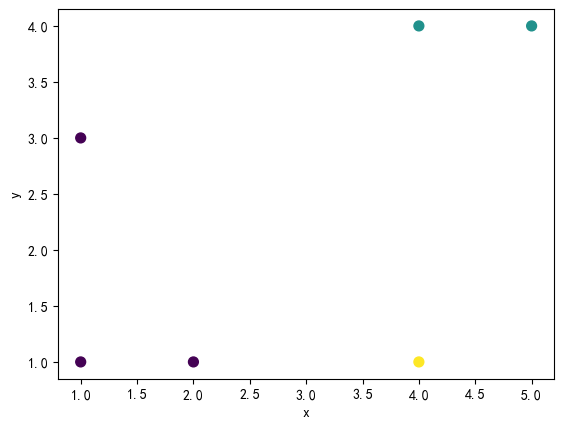

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

data = pd.read_csv("../data/class07/data.csv")
model = AgglomerativeClustering(linkage="ward", n_clusters=3)
model.fit(data)
labels = model.labels_
data = pd.concat((data, pd.DataFrame({"label":labels})),axis=1)
print(data)


color_val = ['b','c','g','m','y','b','k','w']
plt.figure()
plt.scatter(data.loc[:,'x'], data.loc[:,'y'], s=50, c=data.loc[:,'label'].astype(np.float64))
plt.xlabel('x')
plt.ylabel('y')
plt.show()



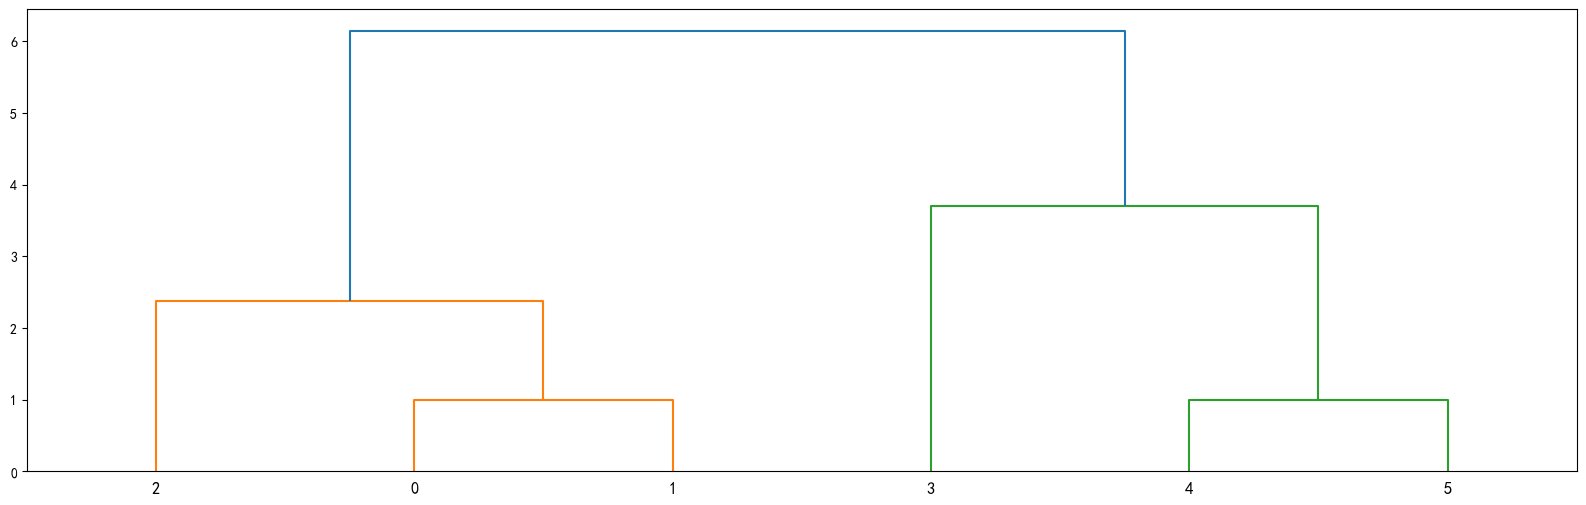

In [49]:
from scipy.cluster.hierarchy import linkage, dendrogram
from IPython import get_ipython

get_ipython().run_line_magic("matplotlib", "inline")

plt.figure(figsize=(20,6))
Z = linkage(data, method="ward", metric="euclidean")
# 聚类树图(dendrogram)绘制
p = dendrogram(Z, 0)
plt.show()

利用Agglomerative算法，分别采用组间最小距离、平均距离和最大距离进行聚类分析

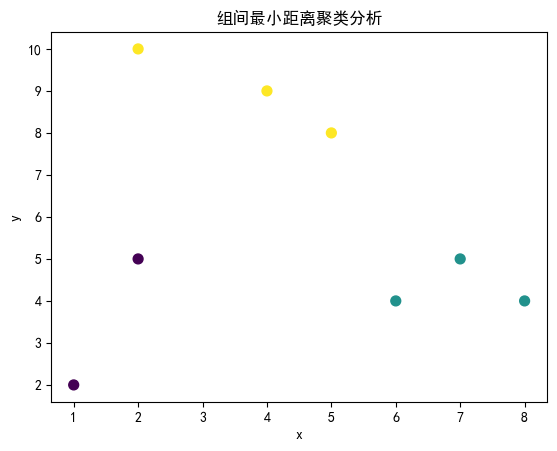

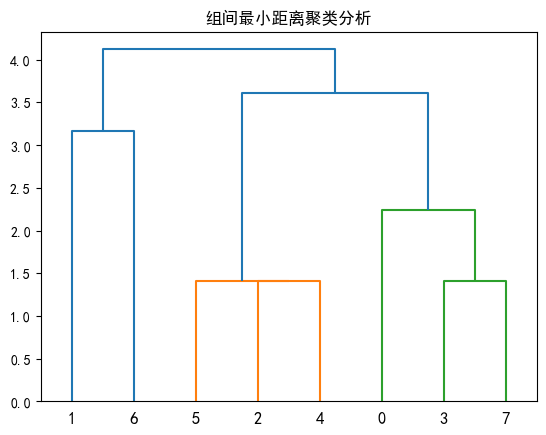

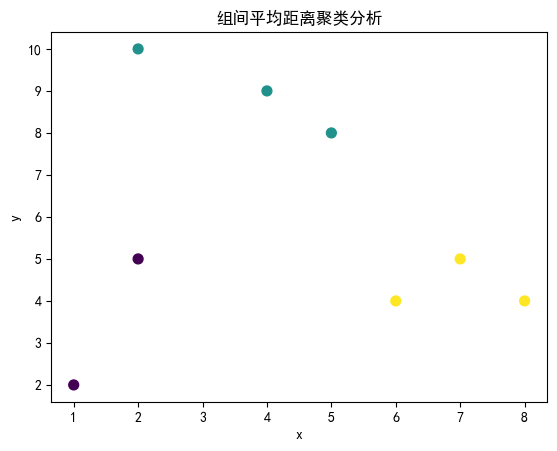

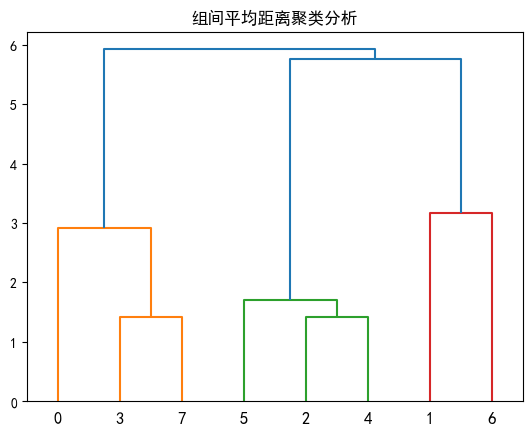

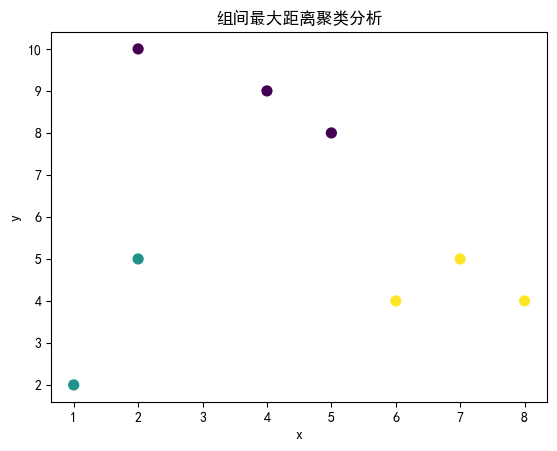

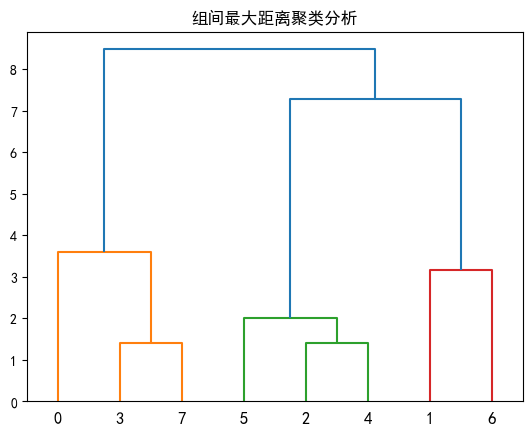

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from IPython import get_ipython

data = pd.read_csv("../data/class07/data2.csv")

model_name = ["最小距离","平均距离","最大距离"]
linkage_list = ['single', 'average', 'complete']
for link, name in zip(linkage_list, model_name):
    model = AgglomerativeClustering(linkage=link, n_clusters=3)
    model.fit(data)
    labels = model.labels_
    result = pd.concat((data, pd.DataFrame({"label":labels})),axis=1)
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    plt.figure()
    plt.title("组间"+name+"聚类分析")
    plt.scatter(result.loc[:,'x'], result.loc[:,'y'], s=50, c=result.loc[:,'label'].astype(np.float64))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    get_ipython().run_line_magic("matplotlib", "inline")
    plt.figure()
    plt.title("组间"+name+"聚类分析")
    Z = linkage(data,method=link, metric="euclidean")
    p = dendrogram(Z, 0)
    plt.show()